#### Seting up  bra-ket notation 
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
(ignore)

# Students: Daniel Delattre and Luis Felipe Cunha Souza


In [3]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.quantum_info.operators import Operator
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import MCMT

# 1) Choose a problem that is not known to have an efficient solution with Classical Computing


## Problem: Unstructured Search
## Choosed algorithm: Grover's algorithm

### Applications and limitations
Grover's algorithm, along with variants like amplitude amplification, can be used to speed up a broad range of algorithms. In particular, algorithms for NP-complete problems generally contain exhaustive search as a subroutine, which can be sped up by Grover's algorithm. The current best algorithm for 3SAT is one such example. Generic constraint satisfaction problems also see quadratic speedups with Grover. These algorithms do not require that the input be given in the form of an oracle, since Grover's algorithm is being applied with an explicit function, e.g. the function checking that a set of bits satisfies a 3SAT instance.

Grover's algorithm can also give provable speedups for black-box problems in quantum query complexity, including element distinctness and the collision problem (solved with the Brassard–Høyer–Tapp algorithm). In these types of problems, one treats the oracle function f as a database, and the goal is to use the quantum query to this function as few times as possible.

### Cryptography
Grover's algorithm essentially solves the task of function inversion. Roughly speaking, if we have a function {\displaystyle y=f(x)}y=f(x) that can be evaluated on a quantum computer, Grover's algorithm allows us to calculate {\displaystyle x}x when given {\displaystyle y}y. Consequently, Grover's algorithm gives broad asymptotic speed-ups to many kinds of brute-force attacks on symmetric-key cryptography, including collision attacks and pre-image attacks. However, this may not necessarily be the most efficient algorithm since, for example, the parallel rho algorithm is able to find a collision in SHA2 more efficiently than Grover's algorithm.

### Limitations
Grover's original paper described the algorithm as a database search algorithm, and this description is still common. The database in this analogy is a table of all of the function's outputs, indexed by the corresponding input. However, this database is not represented explicitly. Instead, an oracle is invoked to evaluate an item by its index. Reading a full database item by item and converting it into such a representation may take a lot longer than Grover's search. To account for such effects, Grover's algorithm can be viewed as solving an equation or satisfying a constraint. In such applications, the oracle is a way to check the constraint and is not related to the search algorithm. This separation usually prevents algorithmic optimizations, whereas conventional search algorithms often rely on such optimizations and avoid exhaustive search.

The major barrier to instantiating a speedup from Grover's algorithm is that the quadratic speedup achieved is too modest to overcome the large overhead of near-term quantum computers. However, later generations of fault-tolerant quantum computers with better hardware performance may be able to realize these speedups for practical instances of data.


### References:
- Grover's algorithm: https://en.wikipedia.org/wiki/Grover%27s_algorithm
- Grover’s algorithm:  https://quantum-computing.ibm.com/composer/docs/iqx/guide/grovers-algorithm
- Grover’s algorithm – unstructured search:  https://leftasexercise.com/2018/10/29/grovers-algorithm-unstructured-search-with-a-quantum-computer/#r1
- Unstructured search: https://www.cse.iitk.ac.in/users/rmittal/prev_course/s21/reports/11_search.pdf

# 2) Describe the computational difficulty of solving the problem


### Unstructured search

Suppose that we have a function

$ f : \{0, 1\} ^n → \{0, 1\} $ 



That is implemented by a reversible transformation $B_{f}$ in the usual way:


$ B_{f} \ket{x} \ket{a} = \ket{x}  \ket{a ⊕ f(x)} $

for all $ x ∈ \{0, 1\}^n$ and $a ∈ \{0, 1\}$ 

The problem of *search* is simply to find a string $x ∈ \{0, 1\}^n$


Such that $ f(x) = 1 $, or to conclude that no such **x** exists if $f$ is identically **0**.


#### It is important to note that this searching problem is completely *unstructured*. 
There are no promises on the function $f$, so it is *not possible to use binary search or any other fast searching
method to efficiently solve the problem classically.*


### What is the best classical algorithm for solving the above search problem? 
As we have noted before, it is more complicated than one might initially think to rigorously prove lower bounds
on algorithms. In this particular case it is not too hard, but because our focus is on the quantum algorithm for the problem we will spend more focuss discuting the quantum algorithm than the issue of classical complexity.


It is not hard to see that a deterministic algorithm would need to make $2^n$ queries to the blackbox in the worst case (to distinguish the case where $f$ is identically **0** from any of the cases where there is a single $x$ for which $f(x) = 1$, for instance).


Probabilistically, a best strategy for an algorithm that makes $k$ queries is to simply choose $k$ distinct values of $x$ and to query the black-box at these $k$ values. In the case that there is a single
value of x for which $f(x) = 1$, and we require that our algorithm succeeds in finding this $x$ with
probability at least $1 − ε$, then we must have $1 − \frac{k}{2^n} ≤ ε$. 

- This implies $k ≥ (1 − ε)2^n$, so for constant error we therefore need 
$k = Ω(2^n)$ 
queries to solve the problem.

- In contrast, Grovers algorithm will solve the problem using $ O(
√2^n)$ queries.


### References:

- Lecture 12: Grover’s Algorithm: https://www.cs.umd.edu/class/spring2018/cmsc457/Lectures/Wat-06-Lec-12.pdf


# 3) Describe a boolean or phase oracle (not yet optimized) to generate solutions to the problem

## Introduction
Grover's algorithm demonstrates the capability of searching unordered databases with superior speed. This algorithm can speed up an unstructured search problem quadratically, but its uses extend beyond that; it can serve as a general trick or subroutine to obtain quadratic run time improvements for a variety of other algorithms. This is called the **amplitude amplification trick**


## Sample Problem

Suppose you are given a large list of $N$ items. Among these items there is one item with a unique property that we wish to locate; we will call this one the winner w. 

To find the w using classical computation, one would have to check on average $N/2$ of these items, and in the worst case, all of them. Using Grover's amplitude amplification trick we can find the marked item in roughly $√N$ steps with. A quadratic speedup is a substantial time-saver for finding items in long lists.

Additionally, the algorithm does not use the list's internal structure, which makes it generic; this is why it immediately provides a quadratic quantum speed-up for many classical problems.


### Amplitude Amplification 

Before looking at the list, any guess of where the w is would be as good as any other, wich can be expressed in terms of the following superposition:

$\ket{s} = \frac{1}{√2} \sum_{x=0}^{N-1} \ket{x}$

If at this point we were to measure in the standard basis  $\{|x⟩\}$
 , this superposition would collapse, according to the fifth quantum law, to any one of the basis states with the same probability of
$\frac{1}{N}=\frac{1}{2^n}$


Our chances of guessing the right value  $w$  is therefore  $1$  in  $2^n$, as could be expected. Hence, on average we would need to try about  $\frac{N}{2}=2^{n−1}$  times to guess the correct item

Enter the procedure called amplitude amplification, which is how a quantum computer significantly enhances this probability. This procedure stretches out (amplifies) the amplitude of the marked item, which shrinks the other items' amplitude, so that measuring the final state will return the right item with near-certainty.

This algorithm has a nice geometrical interpretation in terms of two reflections, which generate a rotation in a two-dimensional plane. The only two special states we need to consider are the winner 
$|w⟩$  and the uniform superposition  $|s⟩$.

These two vectors span a two-dimensional plane in the vector space  
$C^N$.  They are not quite perpendicular because  $|w⟩$
  occurs in the superposition with amplitude  
$N^{−1/2}$  as well. We can, however, introduce an additional state  $|s′⟩$ that is in the span of these two vectors, which is perpendicular to  $|w⟩$  and is obtained from  $|s⟩$  by removing  $|w⟩$  and rescaling.

More details about the Amplitude Amplification operation can be found at [qiskit reference](https://qiskit.org/documentation/tutorials/algorithms/06_grover.html#Amplitude-amplification)

And from the explanation on the reference we get that in the case that there are multiple solutions $(M)$, it can be shown that roughly  
$√\frac{N}{M}$  rotations will suffice.

#### High level Groover circuit:

<img src="imgs/grover_circuit_high_level.png" />


<br><br>



### References:
- https://qiskit.org/textbook/ch-algorithms/grover.html#Unstructured-Search

## Example solving the problem with 2 Qubits, where N = 4

In this particular case, only one rotation is required to rotate the initial state $|s⟩$ to the winner $|w ⟩$:


### Qiskit Implementation



1. Following the above introduction, in the case $N = 4$
  we have $θ = \arcsin \frac{1}{2} = \frac{π}{6}$
 
2. After $t$ steps, we have
$( U_{s} U_{ω})^t \ket{s} = sin θ_{t} \ket{ω} + cos θ_{t}\ket{s′}$, where $θ_{t} = (2t + 1)θ$.
 
3. In order to obtain $| ω ⟩$ we need  $θ_{t} = \frac{π}{2}$, which with  $θ = \frac{π}{6}$ inserted above results to  
$t = 1$. This implies that after  $t = 1$ rotation the searched element is found.  We will now follow through an example using a specific oracle.

### Oracle for  $| ω ⟩ = | 11 ⟩$
  
Let's look at the case  $| w ⟩ = | 11 ⟩$ . The oracle  $U_{ω}$ in this case acts as follows: 

$U ω | s ⟩ = U_{ω} \frac{1}{2} ( | 00 ⟩ + | 01 ⟩ + | 10 ⟩ + | 11 ⟩) = \frac{1}{2} ( | 00 ⟩ + | 01 ⟩ + | 10 ⟩ − | 11 ⟩)$.

or:

$U_{ω} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                         0 & 1 & 0 & 0 \\
                         0 & 0 & 1 & 0 \\
                         0 & 0 & 0 & −1 \end{bmatrix}$ 
                         
which you may recognise as the controlled-Z gate. Thus, for this example, our oracle is simply the controlled-Z gate: 







Oracle is simply the controlled-Z gate


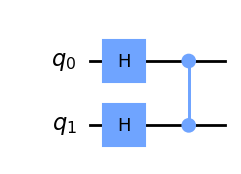

In [4]:
# Circuit 1 - 2 Qubit
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)
qc.h(q[0])
qc.h(q[1])
qc.cz(0, 1)

print('Oracle is simply the controlled-Z gate')
display(qc.draw('mpl'))

### Reflection  $U_{s}$
  
In order to complete the circuit we need to implement the additional reflection  
 $U_{s} = 2 | s ⟩ ⟨ s | − 1$. 
 
 Since this is a reflection about  
$| s ⟩$, we want to add a negative phase to every state orthogonal to $| s ⟩$ .  

One way we can do this is to use the operation that transforms the state  $| s ⟩ → | 0 ⟩$ , which we already know is the Hadamard gate applied to each qubit: 

$H ⊗ n |s ⟩ = | 0 ⟩$

Then we apply a circuit that adds a negative phase to the states orthogonal to  $| 0 ⟩$:

$U_{0} \frac{1}{2} ( | 00 ⟩ + | 01 ⟩ + | 10 ⟩ + | 11 ⟩) =  \frac{1}{2} ( | 00 ⟩ − | 01 ⟩ − | 10 ⟩ − | 11 ⟩)$

i.e. the signs of each state are flipped except for  
$| 00 ⟩$ . As can easily be verified, one way of implementing  


$U_{0}$ is the following circuit:



Circuit for reflection around |0>


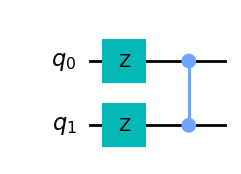

In [5]:
# Circuit 2 - 2 Qubit
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)
qc.z(q[0])
qc.z(q[1])
qc.cz(0, 1)
print('Circuit for reflection around |0>')
display(qc.draw('mpl'))

Finally, we do the operation that transforms the state  $| 0 ⟩ → | s ⟩$ (the H-gate again): 
$H^{⊗n} U_{0}H^{⊗n} = U_{s}$
 
The complete circuit for $U_{s}$ looks like this:



Circuit for reflection around |s>


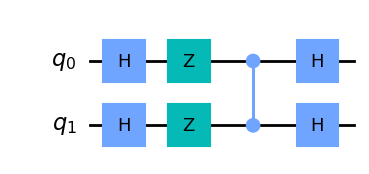

In [6]:
# Circuit 3 - 2 Qubit
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)
qc.h(q[0])
qc.h(q[1])
qc.z(q[0])
qc.z(q[1])
qc.cz(0, 1)
qc.h(q[0])
qc.h(q[1])

print('Circuit for reflection around |s>')
display(qc.draw('mpl'))


### Full Circuit for  $| w ⟩ = | 11 ⟩$
  
Since in the particular case of $N = 4$ only one rotation is required we can combine the above components to build the full circuit for Grover's algorithm for the case  
$| w ⟩ = | 11 ⟩$


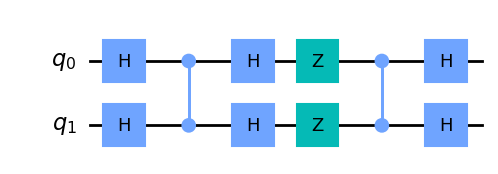

In [7]:
# Circuit 4 - 2 Qubit
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)
qc.h(q[0])
qc.h(q[1])
qc.cz(0, 1)
qc.h(q[0])
qc.h(q[1])
qc.z(q[0])
qc.z(q[1])
qc.cz(0, 1)
qc.h(q[0])
qc.h(q[1])

display(qc.draw('mpl'))

### Qiskit Implementation for 2 qubits 
We now implement Grover's algorithm for the above case of 2 qubits for  $| w ⟩
= | 11 ⟩$

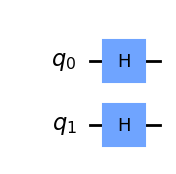

In [8]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

n = 2
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw('mpl')

Apply the Oracle for  $|w⟩=|11⟩$ (oracle is specific to 2 qubits)

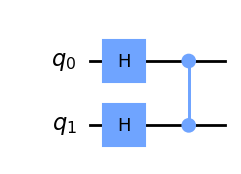

In [9]:
grover_circuit.cz(0,1) # Oracle
grover_circuit.draw('mpl')

Apply the diffuser $(U_{s})$ specific for two qubits

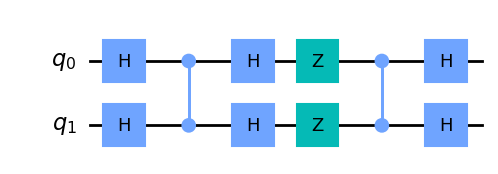

In [10]:
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw('mpl')

## Experiment circuit using simulators

In [14]:
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()

from qiskit_textbook.tools import vector2latex
#pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

vector2latex(statevec, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

As expected, the amplitude the every state $|11⟩$ is $1$, this means we have a 100% chance of measuring  $|11⟩$, and the amplitude of amplitude others states is $0$

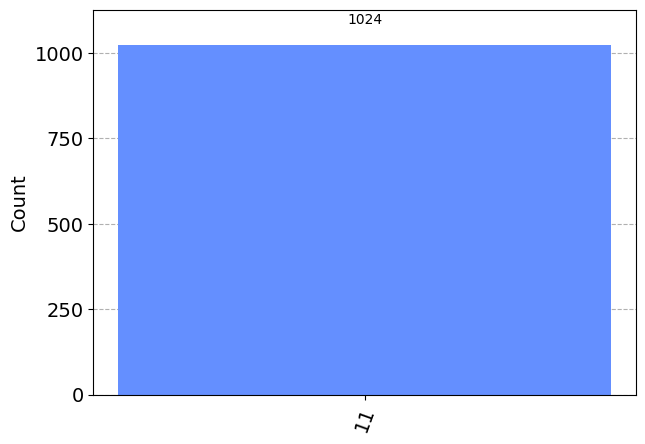

In [15]:
grover_circuit.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

## Now that we made this example, lets solve a problem for 3 Qubits

 Grover's algorithm for 3 qubits with two marked states $|101⟩$ and $|110⟩$
 , following the implementation in the example for 2 Qubits.
### The quantum circuit to solve the problem using a phase oracle is:

<img src="imgs/grover_circuit_3qubits.png" />


1. Apply Hadamard gates to  
$3$ qubits initialized to $|000⟩$ to create a uniform superposition:

    $|ψ_{1}⟩= \frac{1}{√8}(|000⟩+|001⟩+|010⟩+|011⟩+|100⟩+|101⟩+|110⟩+|111⟩)$
 
2. Mark states $|101⟩$ and $|110⟩$  using a phase oracle:

    $|ψ_{2}⟩=\frac{1}{√8}(|000⟩+|001⟩+|010⟩+|011⟩+|100⟩−|101⟩−|110⟩+|111⟩)$
 
Then 

3. **perform the reflection around the average amplitude**:

    3.1 Apply Hadamard gates to the qubits

    $| ψ3_{a}⟩=\frac{1}{2}(|000⟩+|011⟩+|100⟩−|111⟩)$

    3.2 Apply $X$ gates to the qubits

    $|ψ3_{b}⟩=\frac{1}{2}(−|000⟩+|011⟩+|100⟩+|111⟩)$

    3.3 Apply a doubly controlled Z gate between the 1, 2 (controls) and 3 (target) qubits

    $|ψ_{3c}⟩=\frac{1}{2}(−|000⟩+|011⟩+|100⟩−|111⟩)$

    3.4 Apply $X$ gates to the qubits

    $|ψ_{3d}⟩=\frac{1}{2}(−|000⟩+|011⟩+|100⟩−|111⟩)$

    3.5 Apply Hadamard gates to the qubits

    $|ψ_{3e}⟩=\frac{1}{√2}(−|11⟩−|10⟩)$

    
4. Measure the 3 qubits to retrieve states $|101⟩$ and $|110⟩$
 
Note that since there are 2 solutions and 8 possibilities, we will only need to run one iteration (steps 2 & 3).

## Qiskit code Implementation 

Implementing the Grover's algorithm for 3 qubits and searching for two marked states $|101⟩$ and $|110⟩$
 
 . Note: Remember that Qiskit orders it's qubits the opposite way round to this resource, so the circuit drawn will appear flipped about the horizontal.

We create a phase oracle that will mark states  $|101⟩$ and $|110⟩$
  as the results (step 1).

In [16]:
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

Creating the diffuser that works with any number of Qubits

In [17]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

After that, we will create a uniform superposition at the start of the circuit and a measurement at the end.
As there are 2 solutions for 8 possibilities, we will only need to run one iteration

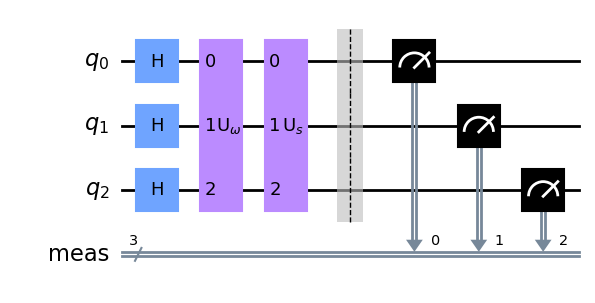

In [18]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw('mpl')

# Second part of project...

## Only to make clear what we are doing: 

1. We are looking for two numbers: 101 and 110 in a sample of all possible numbers made with 3 qubits
2. This process runned 1024 times in the simulator, to get our result
3. In this simulation, the process took: 1.66 ms to run
4. All of this process will be reproduced in python - classical sequential search 

## Using the simulator

In [61]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)

In [84]:
%%time
results = aer_sim.run(qobj).result()

CPU times: user 1.66 ms, sys: 0 ns, total: 1.66 ms
Wall time: 1.62 ms


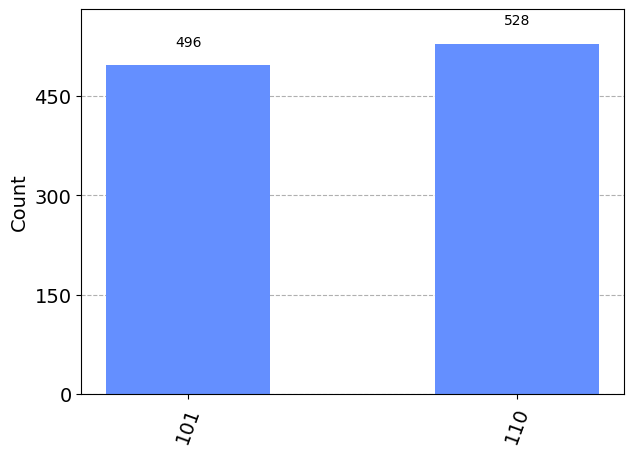

In [85]:
counts = results.get_counts()
plot_histogram(counts)

## As expected the final result shows that our algorithm discovered our marked states $|101⟩$ and $|110⟩$

## Classical solution: *Search in unsorted list*

- As we are dealing with a unsorted list, we cannot use algorithms such as **Binary Search Tree** that would reduce the complexity from O(n) to O(logn) if the list were sorted.


- That beign said, our best approach would be a sequential search, and by that I mean: Iterate over all elements of the list to verify if our desired element is present or not, and return it's index in the list.


- This idea can be translated as code in the following form:

In [65]:
def unstructured_search(desired, array):
    index = -1
    for idx in range(len(array)):
        if desired == array[idx]:
            index = idx
            continue

    if index == -1:
        print(f"Element {desired} is not present in the array.")    
    
    return index

In [86]:
%%time
array = [3, 1, 2, 4, 5, 7, 8, 6]

for i in range(1024):
    desired = 5
    index = unstructured_search(desired, array)
    
print(f"Element {desired} is found in the array at index", str(index))
    
    
for i in range(1024):
    desired = 6
    index = unstructured_search(desired, array)
print(f"Element {desired} is found in the array at index", str(index))


Element 5 is found in the array at index 4
Element 6 is found in the array at index 7
CPU times: user 790 µs, sys: 812 µs, total: 1.6 ms
Wall time: 1.6 ms


### After we run both solutions: Quantum and Classical on the local machine, we will proceed to run the quantum solution on the Real Quantum Device, using the IBM Quantum platform.


# Real Quantum Device

In [94]:
IBMQ.load_account()

provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmq_qasm_simulator')

ibmqfactory.load_account:WARNING:2022-12-08 20:34:25,036: Credentials are already in use. The existing account in the session will be replaced.


In [91]:
transpiled_grover_circuit = transpile(grover_circuit, device)
qobj = assemble(transpiled_grover_circuit)

In [92]:
%%time
results = device.run(qobj).result()

CPU times: user 113 ms, sys: 7.12 ms, total: 121 ms
Wall time: 5.08 s


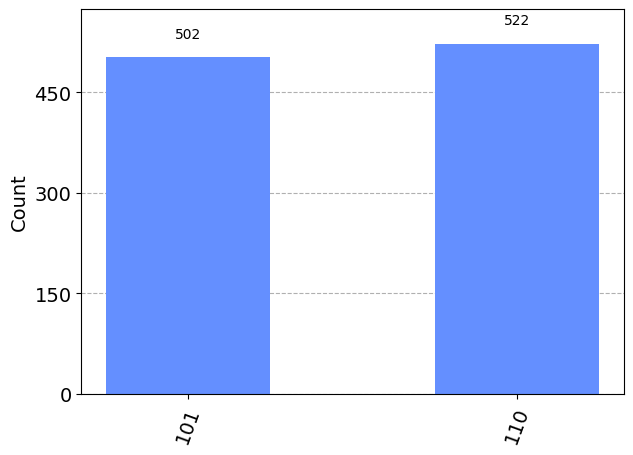

In [93]:
counts = results.get_counts()
plot_histogram(counts)

# Conclusion

- As we can see the summary of the results are:

1. Quantum solution on local machine: took 1.66 ms
2. Classical solution on local machine: took 1.6 ms
3. Quantum solution on IBM real Quantum Computer: took 5.08 s

- Both results (quantum solution local and classical solution local) showed predicted results. Because the total size of the input array is very short (only 8 elements) the expected result would be a very similar time of execution. 


- As the classical solution have a  time complexity of O(n) and the Quantum solution have O(sqrt(n)) with short arrays, the time of processing should be very short. But as the size of input grows, the time for the classical solution should increase much more considerably than the quantum solution. 


- This behaviour of **execution time vs input_size** that grows much faster for classical than for quantum solution can be demonstrated with the following graphic:

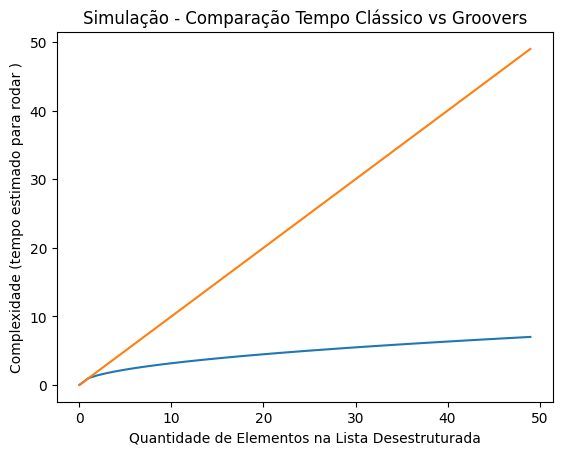

In [95]:
import matplotlib.pyplot as plt
import math

MAX = 50
simulacao_groover  = [math.sqrt(i) for i in range(MAX)]
simulacao_classica = [i for i in range(MAX)]
xaxis = simulacao_classica

plt.plot(xaxis, simulacao_groover)
plt.plot(xaxis, simulacao_classica)
plt.xlabel("Quantidade de Elementos na Lista Desestruturada")
plt.ylabel("Complexidade (tempo estimado para rodar )")
plt.title("Simulação - Comparação Tempo Clássico vs Groovers")
plt.show()

## Finally

- The time of execution (5 seconds) that the Quantum solution running on a real device took was not expected. But it could be related to Network latency. So this 5 seconds must include not only the **real** time of execution processing. But also all the time that the information took to propagate over the internet.

# Acknowledges

- Grover's algorithm: https://en.wikipedia.org/wiki/Grover%27s_algorithm
- Grover’s algorithm:  https://quantum-computing.ibm.com/composer/docs/iqx/guide/grovers-algorithm
- Grover’s algorithm – unstructured search:  https://leftasexercise.com/2018/10/29/grovers-algorithm-unstructured-search-with-a-quantum-computer/#r1
- Unstructured search: https://www.cse.iitk.ac.in/users/rmittal/prev_course/s21/reports/11_search.pdf

- Lecture 12: Grover’s Algorithm: https://www.cs.umd.edu/class/spring2018/cmsc457/Lectures/Wat-06-Lec-12.pdf

- Amplitude-amplification: https://qiskit.org/documentation/tutorials/algorithms/06_grover.html#Amplitude-amplification)

- Grover’s unstructured search: https://qiskit.org/textbook/ch-algorithms/grover.html#Unstructured-Search
- Grover’s algorithm https://qiskit.org/textbook/ch-algorithms/grover.html